# Electricity Market & Sector Coupling Project

### Calculation of the Levelized Cost of Hydrogen Production from Natural Gas Steam Methane Reformer and Water Elecrolyser - Germany (Main Case)

$Assumptions$ & $Parameters$

In [1]:
q_H2 = 2e10                        #Amount of Hydrogen Required by 2030, kWh 
LHV = 33.33                        #Lower Heating Value, kWh/kg
FLH = 4000                         #Full Load Hours, hr
IC = q_H2/FLH                      #Installed Capacity, kW
r = 0.08                           #Discount Rate 
t = 10                             #lifetime, yr
CRF = (r*(1+r)**t)/(((1+r)**t)-1)  #Capital Recovery Factor

$Natural$ $Gas$ & $Electricity$ $Prices$ $in$ $Germany$

In [2]:
P_NG = 0.035       #Natural Gas Price, €/kWh
P_Elect = 0.178    #Electricity Price, €/kWh

$LCOH$  $Calculation$  $of$  $Steam$  $Methane$  $Reformer$  $(SMR)$

In [3]:
Eff_SMR = 0.7                                  #Efficiency
SIC_SMR = 530                                  #Specific Investment Cost, €/kW
ko_SMR = SIC_SMR * IC                          #Total Caital Cost, €/a
OM_SMR = 0.05 * ko_SMR                         #Operation & Maintenace Cost is assumed as 5% of the Total Capital Cost, €/a
g_SMR = ko_SMR * CRF                           #Annual Capital Cost, €/a

mc_SMR = P_NG / Eff_SMR                        #Marginal Cost, €/kWh
LCOH_SMR = ((OM_SMR + g_SMR)/q_H2) + mc_SMR    #Levelized Cost of Hydrogen, €/kWh
print("LCOH from SMR = ", round(LCOH_SMR*100, 1), "cent€/kWh")




$LCOH$ $Calculation$ $of$ $Water$ $Electolyzer$

In [4]:
Eff_WE = 0.7                                 #Efficiency
SIC_WE = 1000                                #Specific Investment Cost, €/kW
ko_WE = SIC_WE * IC                          #Total Caital Cost, €/a
OM_WE = 0.03 * ko_WE                         #Operation & Maintenace Cost is assumed as 3% of the Total Capital Cost, €/a
g_WE = ko_WE * CRF                           #Annual Capital Cost, €/a

mc_WE = P_Elect / Eff_WE                     #Marginal Cost, €/kWh
LCOH_WE = ((OM_WE + g_WE)/q_H2) + mc_WE      #Levelized Cost of Hydrogen, €/kWh
print("LCOH from Water Electrolyzer = ", round(LCOH_WE*100, 1), "cent€/kWh")

LCOH from Water Electrolyzer =  29.9 cent€/kWh


### CO2 Emissions Calculation

$CO2$ $Emissions$ $of$ $SMR$

In [5]:
EMF_NG = 0.202                       #CO2 Emission Factor of Natural Gas, kgCO2/kWh
CO2_SMR = (EMF_NG / Eff_SMR) * q_H2  #Amount of CO2, kgCO2
print("Amount of CO2 Emissions from SMR is", round(CO2_SMR/1000000000, 1), "MntCO2")

Amount of CO2 Emissions from SMR is 5.8 MntCO2


$CO2$ $Emissions$ $of$ $Water Electrolyzer$

In [6]:
EMF_Elec_mix = 0.401                   #CO2 Emission Factor of the Electricity Mix 2019, kgCO2/kWh
CO2_WE = EMF_Elec_mix / Eff_WE * q_H2  #Amount of CO2, kgCO2
print("Amount of CO2 Emissions from Water Electrolyzer is", round(CO2_WE/1000000000, 1), "MntCO2")

Amount of CO2 Emissions from Water Electrolyzer is 11.5 MntCO2


In [7]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
#identifying the CO2 tax
P_CO2 = 0
while LCOH_SMR < LCOH_WE:
    P_CO2 = P_CO2 + 0.025
    mc_SMR = (P_NG/Eff_SMR) + (P_CO2*EMF_NG/Eff_SMR)
    LCOH_SMR = ((OM_SMR + g_SMR)/q_H2) + mc_SMR
    if LCOH_SMR >= LCOH_WE:
        print("Price of CO2 Tax could be", round(P_CO2, 3), "€/kgCO2")

Price of CO2 Tax could be 0.775 €/kgCO2


### Net Public Electricity Generation from Power Plants in Germany in 2019

In [9]:
#Share or Renewables = 46% 

#Development of the CO2 emission factor for the electricity mix in Germany from 2017 to 2019 with the corresponding share of renewables
data= {
    "Year":[2017, 2018, 2019],
    "EMF":[0.485, 0.468, 0.401],
    "Share_of_renew":[0.382, 0.406, 0.460]}
df = pd.DataFrame (data, columns = ['Year','EMF','Share_of_renew'])
print(df)

x = np.array(df['EMF'])
y = np.array(df['Share_of_renew'])
x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
z=model.predict([[0.202]])
print("Share of Renewables is " + str(np.round(z*100, 2)) +"%")


   Year    EMF  Share_of_renew
0  2017  0.485           0.382
1  2018  0.468           0.406
2  2019  0.401           0.460
Share of Renewables is [63.89]%


### Sensitivity Analysis

[6.88714073 7.13714073 7.38714073 7.63714073 7.88714073 8.13714073
 8.38714073]


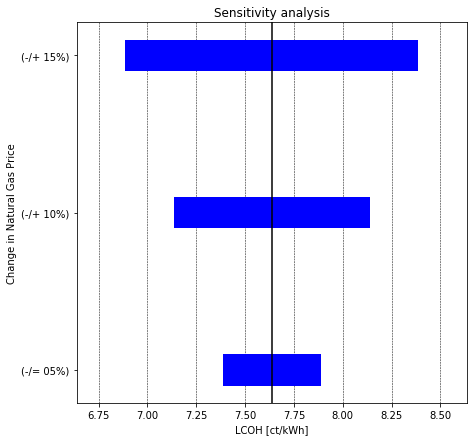

In [10]:
#Effect of Change of Natural Gas Price on SMR LCOH
i = np.arange(0.85,1.16,0.05)      #Percentage Change in Natural Gas Price
NG_price_SA = P_NG * i

mc_SMR = NG_price_SA / Eff_SMR                       
LCOH_SMR = (((OM_SMR + g_SMR)/q_H2) + mc_SMR)*100

j = np.arange(0,7,1)              
z = (LCOH_SMR[j]-LCOH_SMR[3])/LCOH_SMR[3] #Percentage Change in SMR LCOH

print(LCOH_SMR)

fig, ax = plt.subplots(figsize=(7,7))
width = 0.2
Art = ('(-/+ 15%)','(-/+ 10%)','(-/= 05%)')
y_pos = np.arange(len(Art))


base = 7.63714073
Pr = np.array([6.88714073, 7.13714073,  7.38714073])
Pr_n = np.array([8.38714073, 8.13714073,  7.88714073])
Pr_o = base
ax.barh(y_pos, Pr-Pr_n, width, left = Pr_n , align = 'center', color = 'blue')

ax.set_axisbelow(True)
ax.xaxis.grid(color='#000000', linestyle='--', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(Art)
ax.tick_params(axis='y',which='major',left='off')
ax.invert_yaxis()
ax.set_xlabel('LCOH [ct/kWh]')
ax.set_ylabel('Change in Natural Gas Price')
ax.set_title ('Sensitivity analysis')
plt.axvline(base,color='black')
plt.xlim(base-1, base+1)

plt.show()

[26.09002293 27.3614515  28.63288007 29.90430865 31.17573722 32.44716579
 33.71859436]


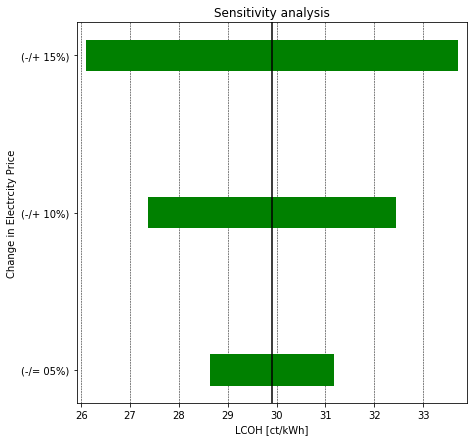

In [11]:
#Effect of Change of Electricity Price on Electrolyzer LCOH
i = np.arange(0.85,1.16,0.05)
Elec_price_SA = P_Elect*i

mc_WE = Elec_price_SA / Eff_WE                        #Marginal Cost, €/kWh
LCOH_WE = (((OM_WE + g_WE)/q_H2) + mc_WE)*100

j = np.arange(0,7,1)
z = (LCOH_WE[j]-LCOH_WE[3])/LCOH_WE[3]

print(LCOH_WE)

fig, ax = plt.subplots(figsize=(7,7))
width = 0.2
Art = ('(-/+ 15%)','(-/+ 10%)','(-/= 05%)')
y_pos = np.arange(len(Art))


base = 29.904
Pr = np.array([26.09002293, 27.3614515,  28.63288007])
Pr_n = np.array([33.71859436, 32.44716579, 31.17573722])
Pr_o = base
ax.barh(y_pos, Pr-Pr_n, width, left = Pr_n , align = 'center', color = 'green')

ax.set_axisbelow(True)
ax.xaxis.grid(color='#000000', linestyle='--', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(Art)
ax.tick_params(axis='y',which='major',left='off')
ax.invert_yaxis()
ax.set_xlabel('LCOH [ct/kWh]')
ax.set_ylabel('Change in Electrcity Price')
ax.set_title ('Sensitivity analysis')
plt.axvline(base,color='black')
plt.xlim(base-4, base+4)

plt.show()

[28.11401376 28.56158748 29.0091612  29.45673492 29.90430865 30.35188237]


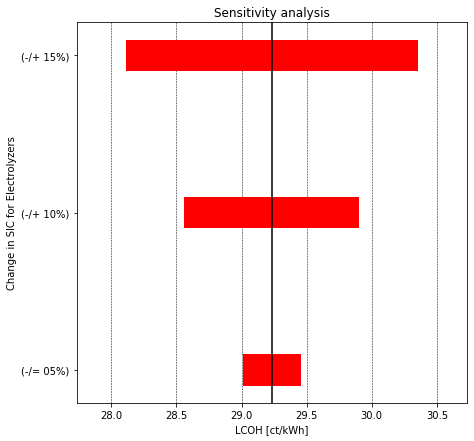

In [12]:
#Effect of Change of Specific Investment Cost of Electrolyzer on LCOH
i = np.arange(0.60,1.11,0.1)
SIC_WE = 1000*i
ko_WE = SIC_WE * IC                          #Total Caital Cost, €/a
OM_WE = 0.03 * ko_WE                         #Operation & Maintenace Cost is assumed as 3% of the Total Capital Cost, €/a
g_WE = ko_WE * CRF                           #Annual Capital Cost, €/a

mc_WE = P_Elect / Eff_WE                        #Marginal Cost, €/kWh
LCOH_WE = (((OM_WE + g_WE)/q_H2) + mc_WE)*100

j = np.arange(0,6,1)
z = np.round((LCOH_WE[j]-LCOH_WE[4])/LCOH_WE[4],2)

print(LCOH_WE)

fig, ax = plt.subplots(figsize=(7,7))
width = 0.2
Art = ('(-/+ 15%)','(-/+ 10%)','(-/= 05%)')
y_pos = np.arange(len(Art))

base = 29.23294806
Pr = np.array([28.11401376, 28.56158748, 29.0091612])
Pr_n = np.array([30.35188237, 29.90430865, 29.45673492])
Pr_o = base
ax.barh(y_pos, Pr-Pr_n, width, left = Pr_n , align = 'center', color = 'red')

ax.set_axisbelow(True)
ax.xaxis.grid(color='#000000', linestyle='--', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(Art)
ax.tick_params(axis='y',which='major',left='off')
ax.invert_yaxis()
ax.set_xlabel('LCOH [ct/kWh]')
ax.set_ylabel('Change in SIC for Electrolyzers')
ax.set_title ('Sensitivity analysis')
plt.axvline(base,color='black')
plt.xlim(base-1.5, base+1.5)

plt.show()